<a href="https://colab.research.google.com/github/SharonCao0920/MachineLearning/blob/main/Started_with_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **To HTML**

In [24]:
!jupyter nbconvert --to html /content/Started_with_Colab.ipynb

[NbConvertApp] Converting notebook /content/Started_with_Colab.ipynb to html
[NbConvertApp] Writing 375091 bytes to /content/Started_with_Colab.html


### **To PDF**

In [25]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 javascript-common libapache-pom-java
  libcommons-logging-java libcommons-parent-java libfontbox-java libgs9
  libgs9-common libidn11 libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6
  libpdfbox-java libptexenc1 libruby2.7 libsynctex2 libteckit0 libtexlua53
  libtexluajit2 libzzip-0-13 lmodern poppler-data preview-latex-style rake
  ruby ruby-minitest ruby-net-telnet ruby-power-assert ruby-test-unit
  ruby-xmlrpc ruby2.7 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf apache2 | lighttpd
  | httpd libavalo

In [26]:
!jupyter nbconvert --to pdf /content/Started_with_Colab.ipynb

[NbConvertApp] Converting notebook /content/Started_with_Colab.ipynb to pdf
[NbConvertApp] Support files will be in Started_with_Colab_files/
[NbConvertApp] Making directory ./Started_with_Colab_files
[NbConvertApp] Making directory ./Started_with_Colab_files
[NbConvertApp] Making directory ./Started_with_Colab_files
[NbConvertApp] Writing 34145 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 88196 bytes to /content/Started_with_Colab.pdf


In [4]:
import numpy as np
import tensorflow.compat.v1 as tf
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# **Create Synthetic data**

In [5]:
num_points_each_cluster = 100
mu1 = [-0.4, 3]
covar1 = [[1.3,0],[0,1]]
mu2 = [0.5, 0.75]
covar2 = [[2.2,1.2],[1.8,2.1]]
X1 = np.random.multivariate_normal(mu1, covar1, num_points_each_cluster)
X2 = np.random.multivariate_normal(mu2, covar2, num_points_each_cluster)
y1 = np.ones(num_points_each_cluster)
y2 = np.zeros(num_points_each_cluster)

# **Let's visualize this data**

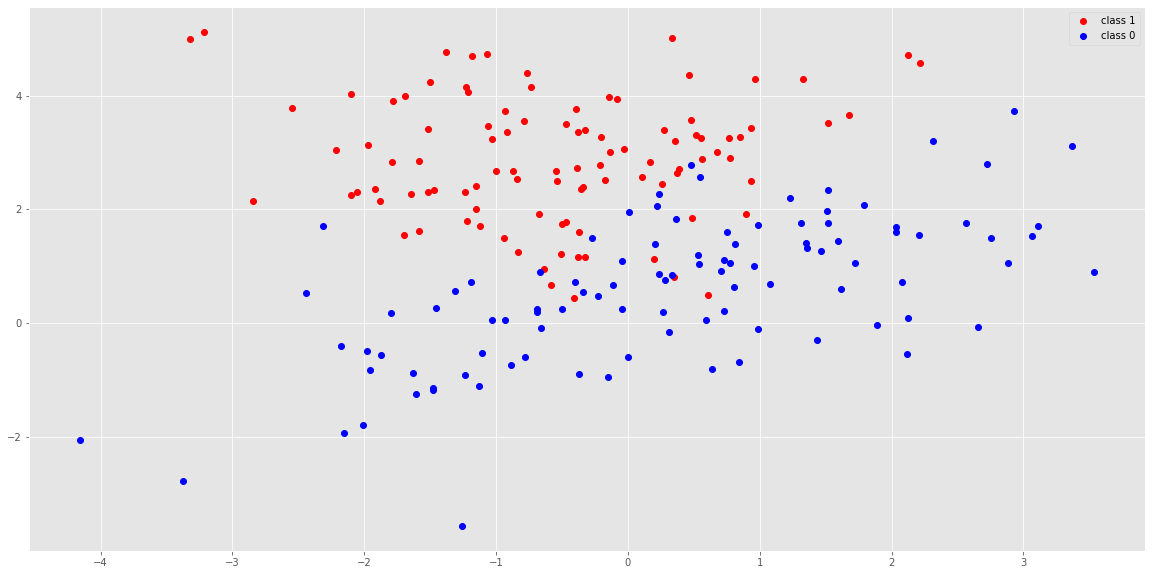

In [6]:
plt.plot( X1[:, 0], X1[:,1], 'ro', label='class 1')
plt.plot(X2[:, 0], X2[:,1], 'bo', label='class 0')
plt.legend(loc='best')
plt.show()

In [19]:
X = np.vstack((X1, X2))
y = np.hstack((y1, y2))
print (X.shape, y.shape)

(200, 2) (200,)


In [18]:
X_tf = tf.constant(X)
y_tf = tf.constant(y)

# **Main logic for KNN**

In [17]:
def predict(X_t, y_t, x_t, k_t):
    neg_one = tf.constant(-1.0, dtype=tf.float64)
    # we compute the L-1 distance
    distances =  tf.reduce_sum(tf.abs(tf.subtract(X_t, x_t)), 1)
    # to find the nearest points, we find the farthest points based on negative distances
    # we need this trick because tensorflow has top_k api and no closest_k or reverse=True api
    neg_distances = tf.multiply(distances, neg_one)
    # get the indices
    vals, indx = tf.nn.top_k(neg_distances, k_t)
    # slice the labels of these points
    y_s = tf.gather(y_t, indx)
    return y_s
    
    
def get_label(preds):
    counts = np.bincount(preds.astype('int64'))
    return np.argmax(counts)

# **Generate a test point**

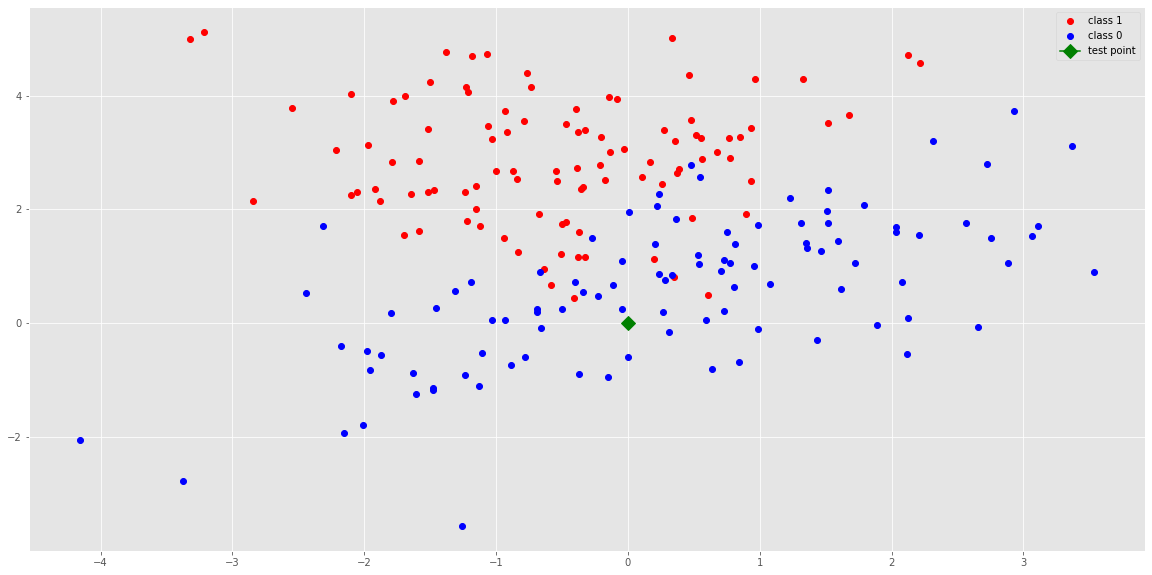

In [16]:
example = np.array([0, 0])
example_tf = tf.constant(example,dtype=tf.float64)

plt.plot( X1[:, 0], X1[:,1], 'ro', label='class 1')
plt.plot(X2[:, 0], X2[:,1], 'bo', label='class 0')
plt.plot(example[0], example[1], 'g', marker='D', markersize=10, label='test point')
plt.legend(loc='best')
plt.show()

In [20]:
k_tf = tf.constant(3)
tf.disable_v2_behavior()
with tf.compat.v1.Session() as sesss:   
   pr = predict(X_tf, y_tf, example_tf, k_tf)
   sess = tf.compat.v1.Session()
   y_index = sess.run(pr)
   print (get_label(y_index))
   # print(sess.run(pr))

0


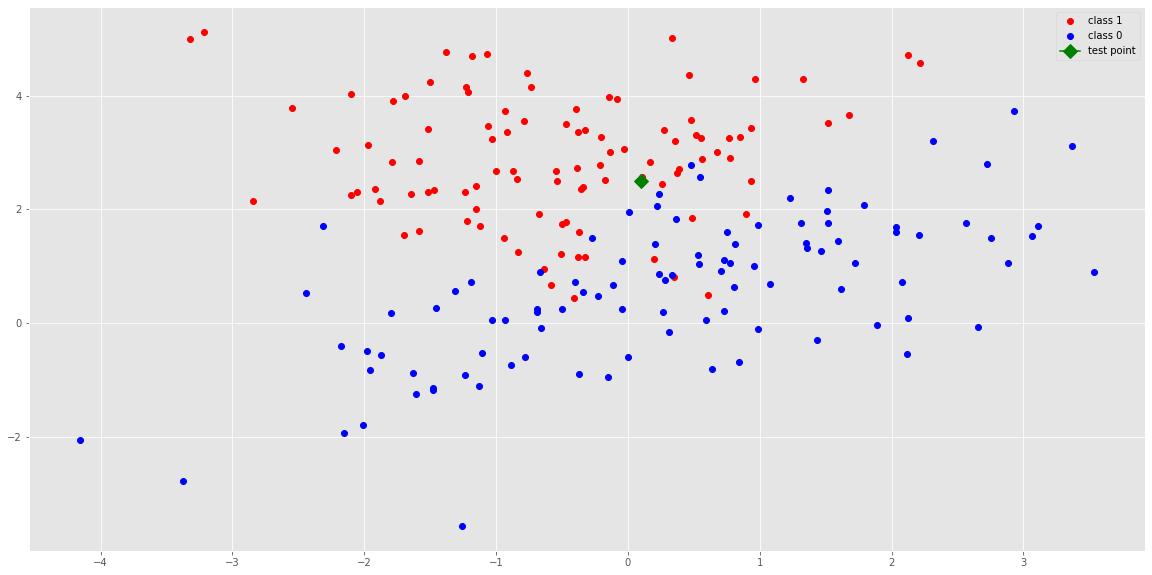

In [12]:
example_2 = np.array([0.1, 2.5])
example_2_tf = tf.constant(example_2)
plt.plot( X1[:, 0], X1[:,1], 'ro', label='class 1')
plt.plot(X2[:, 0], X2[:,1], 'bo', label='class 0')
plt.plot(example_2[0], example_2[1], 'g', marker='D', markersize=10, label='test point')
plt.legend(loc='best')
plt.show()

In [21]:
pr = predict(X_tf, y_tf, example_2_tf, k_tf)
y_index = sess.run(pr)
print (get_label(y_index))

1
